In [4]:
import pandas as pd
from matplotlib import pyplot as plt

dataframes column'names are taken from the `README.md` file in the dataset

In [157]:
# display full numbers separated with spaces instead of scientific notation
pd.set_option('display.float_format', lambda x: '{:,.0f}'.format(x).replace(",", " "))
pd.reset_option('display.float_format')

## characters

In [128]:
characters_df = pd.read_csv("MovieSummaries/character.metadata.tsv", delimiter="\t", header=None)
characters_df.columns = ["Wikipedia movie ID", "Freebase movie ID", "Movie release date", "Character name", "Actor date of birth", "Actor gender", "Actor height (in meters)", "Actor ethnicity (Freebase ID)", "Actor name", "Actor age at movie release", "Freebase character/actor map ID", "Freebase character ID", "Freebase actor ID"]

In [129]:
characters_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450669 entries, 0 to 450668
Data columns (total 13 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Wikipedia movie ID               450669 non-null  int64  
 1   Freebase movie ID                450669 non-null  object 
 2   Movie release date               440674 non-null  object 
 3   Character name                   192794 non-null  object 
 4   Actor date of birth              344524 non-null  object 
 5   Actor gender                     405060 non-null  object 
 6   Actor height (in meters)         154824 non-null  float64
 7   Actor ethnicity (Freebase ID)    106058 non-null  object 
 8   Actor name                       449441 non-null  object 
 9   Actor age at movie release       292556 non-null  float64
 10  Freebase character/actor map ID  450669 non-null  object 
 11  Freebase character ID            192804 non-null  object 
 12  Fr

In [165]:
characters_df.describe()

,Wikipedia movie ID,Actor height (in meters),Actor age at movie release
count,4.506690e+05,154824.000000,292556.000000
mean,1.396975e+07,1.788893,37.788523
std,1.079662e+07,4.379940,20.587870
min,3.300000e+02,0.610000,-7896.000000
25%,3.759292e+06,1.676400,28.000000
50%,1.189065e+07,1.750000,36.000000
75%,2.366501e+07,1.830000,47.000000
max,3.750192e+07,510.000000,103.000000


In [163]:
print("percentage of NaNs per columns")
characters_df.isna().mean() * 100

percentage of NaNs per columns


Wikipedia movie ID                  0.000000
Freebase movie ID                   0.000000
Movie release date                  2.217814
Character name                     57.220488
Actor date of birth                23.552763
Actor gender                       10.120288
Actor height (in meters)           65.645740
Actor ethnicity (Freebase ID)      76.466542
Actor name                          0.272484
Actor age at movie release         35.084064
Freebase character/actor map ID     0.000000
Freebase character ID              57.218269
Freebase actor ID                   0.180842
dtype: float64

In [131]:
characters_df.sample(10)

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height (in meters),Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
265654,1196030,/m/04gf4t,1976,NaN,1943-02-26,M,2,/m/0x67,Bill Duke,32,/m/0jw2lb,NaN,/m/05d79k
238579,323715,/m/01vw8k,2004-05-13,Odysseus,1959-04-17,M,2,NaN,Sean Bean,45,/m/0k7clg,/m/0bvm0f7,/m/02gvwz
310206,10699428,/m/02qmlnp,1974,Shyamal,NaN,M,NaN,NaN,Ravindra Kapoor,NaN,/m/0h7b43y,/m/0h8lp6d,/m/0gdk871
356963,31935934,/m/0dc2ctx,2010-08-07,NaN,NaN,F,NaN,NaN,Gyula Kocsis,NaN,/m/0kd59yw,NaN,/m/0kd59yz
291798,28795885,/m/0dd8wly,1933-11-01,NaN,1883-08-20,M,NaN,NaN,Sergio Tofano,NaN,/m/0g9q2yy,NaN,/m/0c6jq
119990,2669672,/m/07wrl2,2005-04-13,NaN,1978-08-06,M,NaN,/m/0x67,Freeway,26,/m/0gc1sm4,NaN,/m/028f3v
164412,13275998,/m/03c053j,1927-02-13,NaN,1913-10-10,M,NaN,NaN,Johnny Downs,13,/m/040kfsb,NaN,/m/04k4ls
141290,29647722,/m/0fph0tz,1962,Little Red Riding Hood,NaN,NaN,NaN,NaN,Maria Gracia,NaN,/m/0h1lwwv,/m/0h1n2km,/m/0h1lwwy
18618,4099355,/m/0bhys_,1997,NaN,NaN,M,NaN,NaN,William Lightning,NaN,/m/0j_dcr,NaN,/m/0j_d9v
86359,841309,/m/03g2vk,2003,Jake Hopper,1952-04-10,M,2,/m/033tf_,Steven Seagal,50,/m/02vd4c2,/m/0gy66q3,/m/0hqly


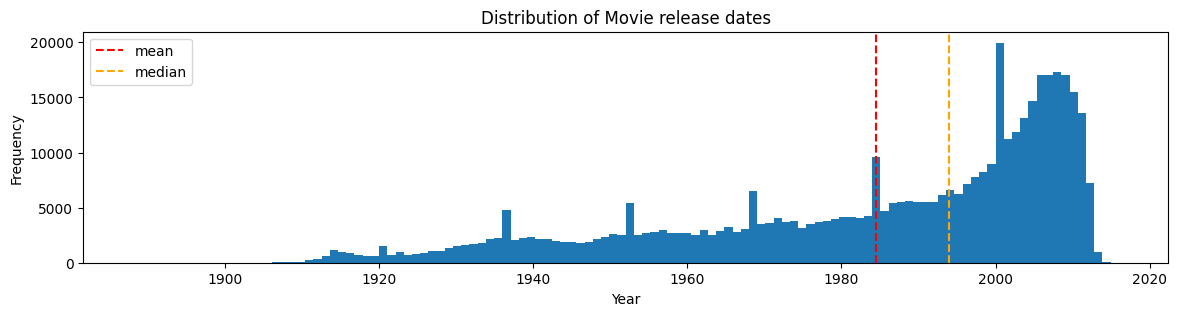

In [167]:
movie_dates = pd.to_datetime(characters_df['Movie release date'], errors='coerce').dt.year
plt.figure(figsize=(14,3))
plt.hist(movie_dates, bins=2020-1900)  
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Movie release dates')
plt.axvline(movie_dates.mean(), linestyle="--", color="red", label="mean")
plt.axvline(movie_dates.median(), color="orange", label="median", linestyle="--")
plt.legend()
plt.show()

<Axes: title={'center': 'Actor age at movie release'}, xlabel='Age', ylabel='Frequency'>

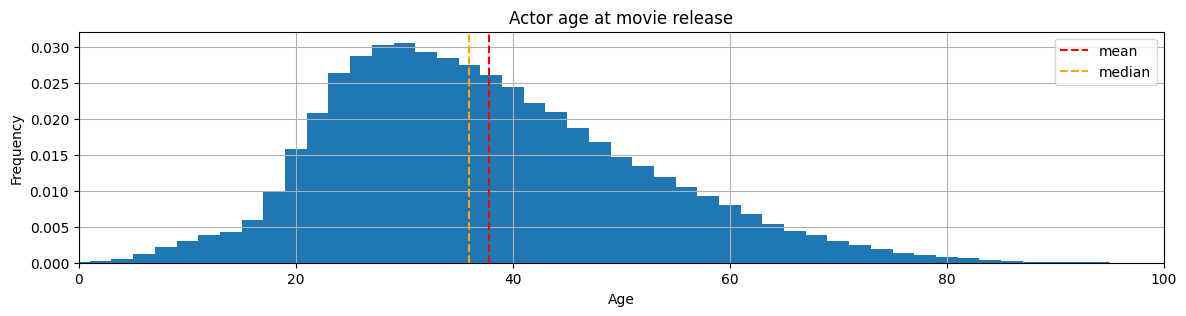

In [133]:
plt.figure(figsize=(14,3))
plt.title("Actor age at movie release")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xlim(0,100)
plt.axvline(characters_df["Actor age at movie release"].mean(), linestyle="--", color="red", label="mean")
plt.axvline(characters_df["Actor age at movie release"].median(), color="orange", label="median", linestyle="--")
plt.legend()
characters_df["Actor age at movie release"].hist(bins=4000, density=True)

In [134]:
"""
actor_dates = pd.to_datetime(characters_df['Actor date of birth'], errors='coerce').dt.year


plt.figure(figsize=(8,3))
plt.hist(actor_dates, bins=50)  
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Actor date of birth')
plt.show()
"""

"\nactor_dates = pd.to_datetime(characters_df['Actor date of birth'], errors='coerce').dt.year\n\n\nplt.figure(figsize=(8,3))\nplt.hist(actor_dates, bins=50)  \nplt.xlabel('Year')\nplt.ylabel('Frequency')\nplt.title('Distribution of Actor date of birth')\nplt.show()\n"

<Axes: xlabel='gender', ylabel='number'>

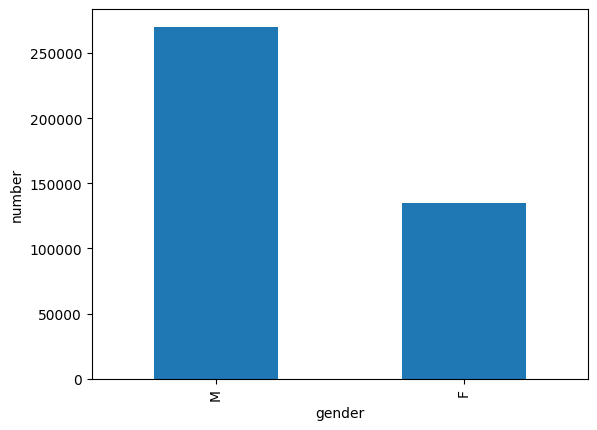

In [151]:
plt.xlabel("gender")
plt.ylabel("number")
characters_df["Actor gender"].value_counts().plot(kind="bar")

## movies

In [5]:
movies_df = pd.read_csv("MovieSummaries/movie.metadata.tsv", delimiter="\t", header=None)
movies_df.columns = ["Wikipedia movie ID", "Freebase movie ID", "Movie name", "Movie release date", "Movie box office revenue", "Movie runtime", "Movie languages (Freebase ID:name tuples)", "Movie countries (Freebase ID:name tuples)", "Movie genres (Freebase ID:name tuples)"]

In [136]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81741 entries, 0 to 81740
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Wikipedia movie ID                         81741 non-null  int64  
 1   Freebase movie ID                          81741 non-null  object 
 2   Movie name                                 81741 non-null  object 
 3   Movie release date                         74839 non-null  object 
 4   Movie box office revenue                   8401 non-null   float64
 5   Movie runtime                              61291 non-null  float64
 6   Movie languages (Freebase ID:name tuples)  81741 non-null  object 
 7   Movie countries (Freebase ID:name tuples)  81741 non-null  object 
 8   Movie genres (Freebase ID:name tuples)     81741 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.6+ MB


In [166]:
movies_df.describe()

,Wikipedia movie ID,Movie box office revenue,Movie runtime
count,8.174100e+04,8.401000e+03,6.129100e+04
mean,1.740784e+07,4.799363e+07,1.118192e+02
std,1.098791e+07,1.121753e+08,4.360070e+03
min,3.300000e+02,1.000000e+04,0.000000e+00
25%,7.323695e+06,2.083193e+06,8.100000e+01
50%,1.777899e+07,1.063969e+07,9.300000e+01
75%,2.715573e+07,4.071696e+07,1.060000e+02
max,3.750192e+07,2.782275e+09,1.079281e+06


In [164]:
print("percentage of NaNs per columns")
movies_df.isna().mean() * 100

percentage of NaNs per columns


Wikipedia movie ID                            0.000000
Freebase movie ID                             0.000000
Movie name                                    0.000000
Movie release date                            8.443743
Movie box office revenue                     89.722416
Movie runtime                                25.018045
Movie languages (Freebase ID:name tuples)     0.000000
Movie countries (Freebase ID:name tuples)     0.000000
Movie genres (Freebase ID:name tuples)        0.000000
dtype: float64

In [138]:
movies_df.sample(10)

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages (Freebase ID:name tuples),Movie countries (Freebase ID:name tuples),Movie genres (Freebase ID:name tuples)
2698,30459784,/m/0cmbrdw,Anuvahood,2011-03-18,NaN,89,{},"{""/m/07ssc"": ""United Kingdom""}","{""/m/03btsm8"": ""Action/Adventure"", ""/m/02kdv5l..."
47581,31026140,/m/0gg5c1n,El muro del silencio,1974-01-31,NaN,105,"{""/m/06nm1"": ""Spanish Language""}","{""/m/0b90_r"": ""Mexico""}","{""/m/07s9rl0"": ""Drama""}"
41284,18631150,/m/04gvkkz,Ultraman,1967-07-22,NaN,79,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/0gw5n2f"": ""Japanese Movies""}"
14304,36277281,/m/0k2l843,Always Faithful,1929-12-31,NaN,10,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/07s9rl0"": ""Dra..."
34435,30490651,/m/0g9y5mz,Ithu Nammude Katha,2011,NaN,NaN,"{""/m/0999q"": ""Malayalam Language""}","{""/m/03rk0"": ""India""}","{""/m/02l7c8"": ""Romance Film"", ""/m/07s9rl0"": ""D..."
37765,31859700,/m/0gttbvd,Mannu,1978,NaN,134,{},{},"{""/m/07s9rl0"": ""Drama""}"
48011,18849274,/m/04glz9d,Maya Machindra,1939,NaN,NaN,"{""/m/07c9s"": ""Tamil Language""}","{""/m/03rk0"": ""India""}","{""/m/07s9rl0"": ""Drama""}"
41508,30404403,/m/0g5pq88,China: The Rebirth of an Empire,NaN,NaN,86,{},{},"{""/m/03hn0"": ""Historical drama"", ""/m/0jtdp"": ""..."
43073,21050216,/m/05b16n_,Tsukigata Hanpeita: Hana no maki; Arashi no maki,1956,NaN,108,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/0gw5n2f"": ""Japanese Movies"", ""/m/01g6gs"":..."
1077,4501185,/m/0c5skt,Universal Soldier: The Return,1999-07-06,10 937 893,89,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/03btsm8"": ""Action/Adventure"", ""/m/01jfsb""..."


<Axes: xlabel='genre', ylabel='count'>

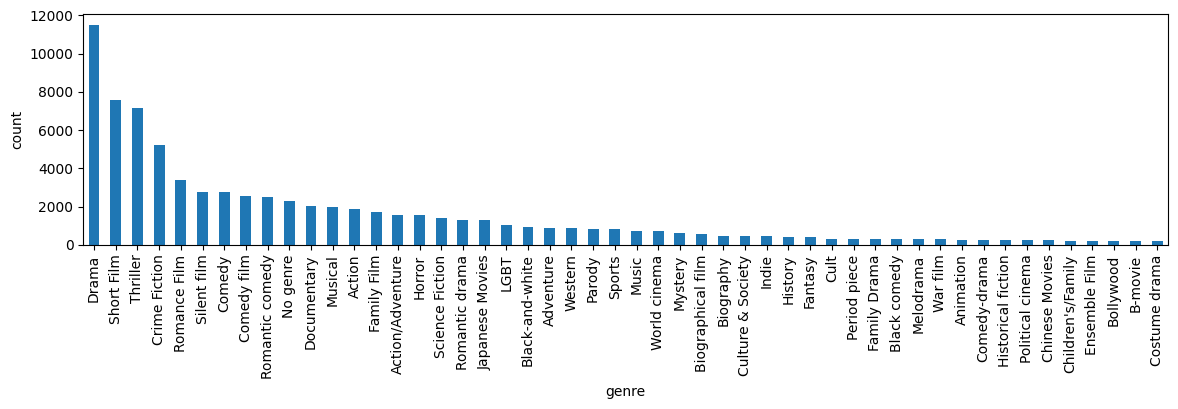

In [37]:
def get_genre(string):
    try:
        return string.split('"')[3]
    except:
        return "No genre"

genres = movies_df["Movie genres (Freebase ID:name tuples)"].apply(get_genre).value_counts().head(50)
plt.figure(figsize=(14,3))
plt.xlabel("genre")
plt.ylabel("count")
genres.plot(kind="bar")

<Axes: title={'center': 'Top 4 genre per year'}, xlabel='Movie release year'>

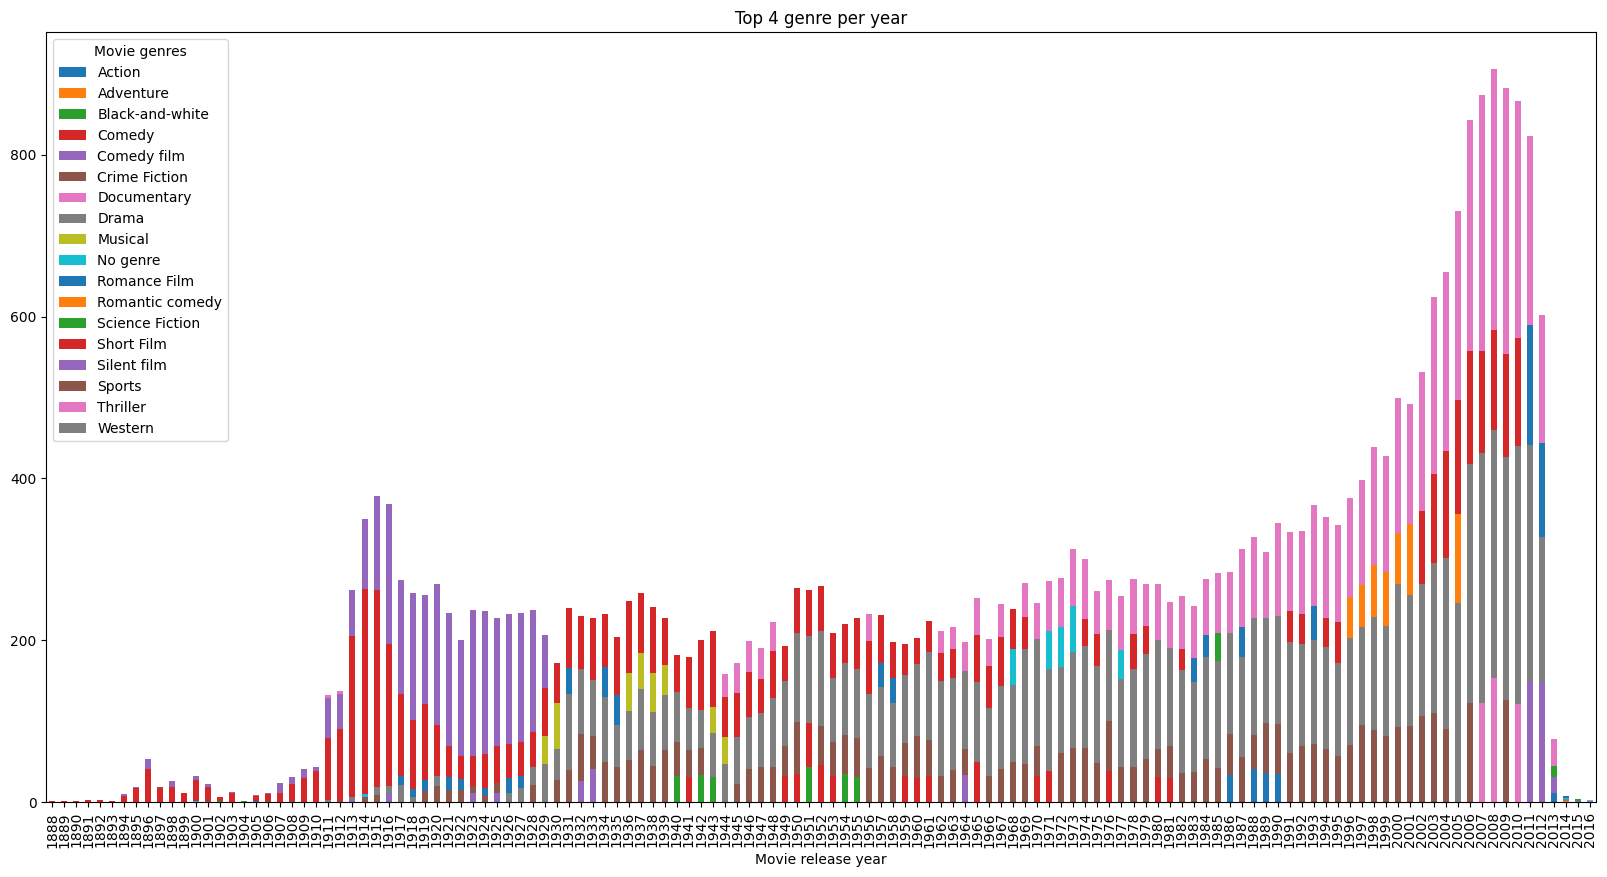

In [50]:

genre_counts = movies_df.copy(deep=True)
def get_year(string):
    try: return string.split("-")[0]
    except: return ""
genre_counts["Movie release year"] =pd.to_datetime(genre_counts['Movie release date'], errors='coerce').dt.year.astype('Int64')
#genre_counts["Movie release date"].apply(get_year)
genre_counts["Movie genres"] = genre_counts["Movie genres (Freebase ID:name tuples)"].apply(get_genre)

genre_counts = genre_counts.groupby(["Movie release year", "Movie genres"]).size().unstack(fill_value=0)

genre_counts.apply(lambda x: x.nlargest(4), axis=1).plot(kind="bar", stacked=True, figsize=(20, 10),
                                                         title="Top 4 genre per year")
#plt.xlim(1910,2011)

<Axes: title={'center': 'Normalized genre distribution per year'}, xlabel='Movie release year'>

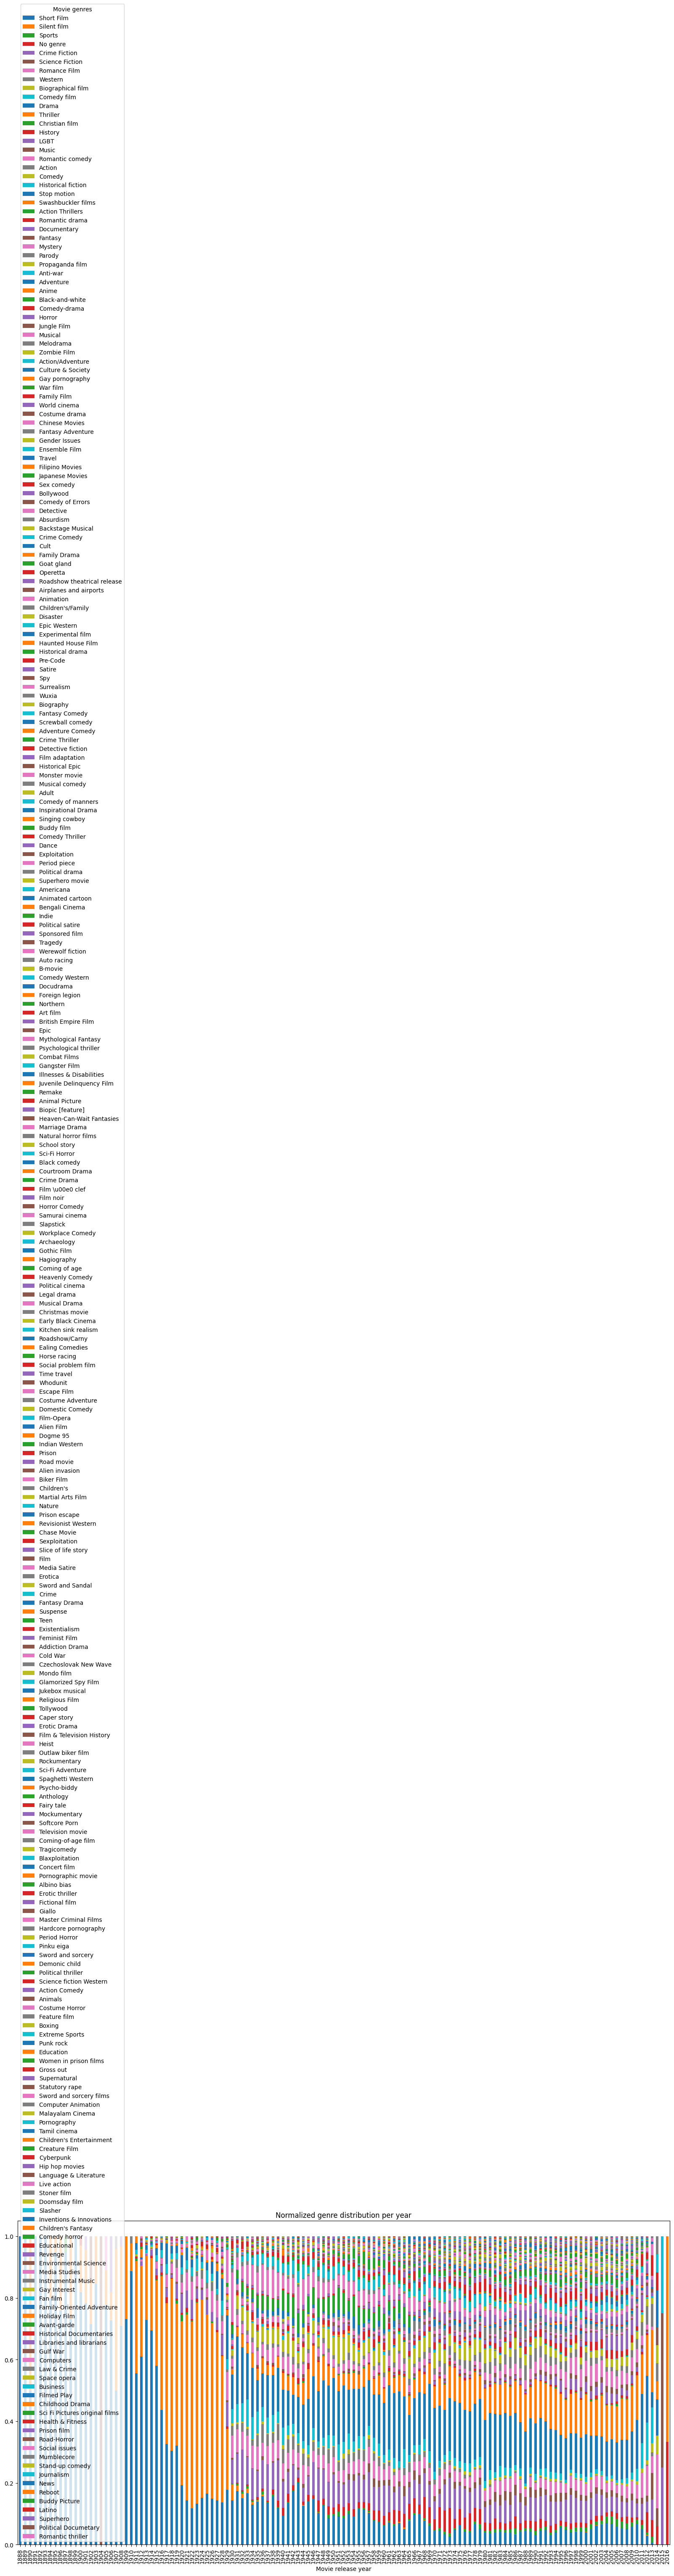

In [49]:
genre_counts.div(genre_counts.sum(axis=1), axis=0).plot(kind="bar", stacked=True, figsize=(20, 10),title="Normalized genre distribution per year")

<Axes: xlabel='country', ylabel='count'>

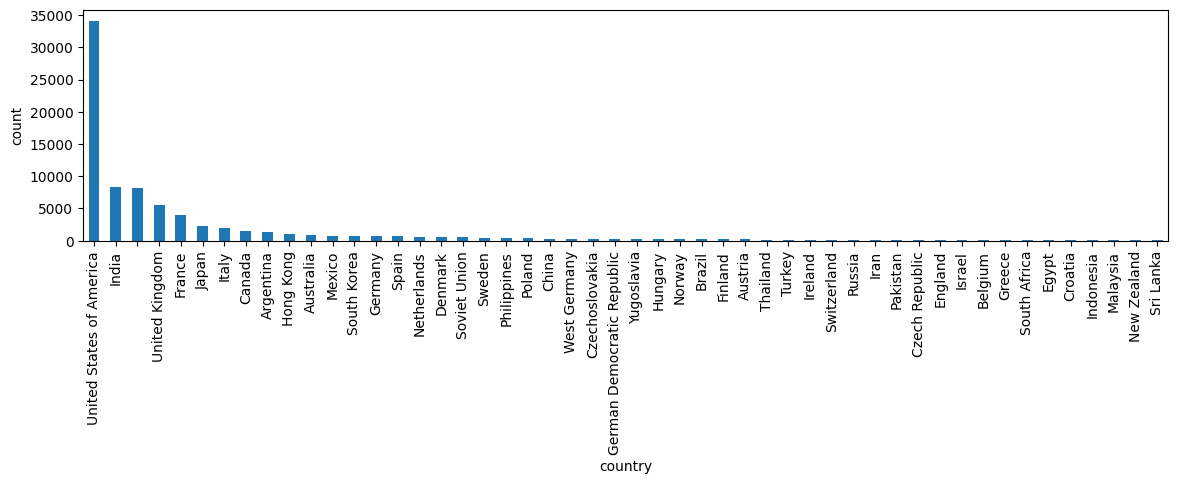

In [140]:
countries = movies_df["Movie countries (Freebase ID:name tuples)"].apply(get_genre).value_counts().head(50)
plt.figure(figsize=(14,3))
plt.xlabel("country")
plt.ylabel("count")
countries.plot(kind="bar")

<Axes: xlabel='language', ylabel='count'>

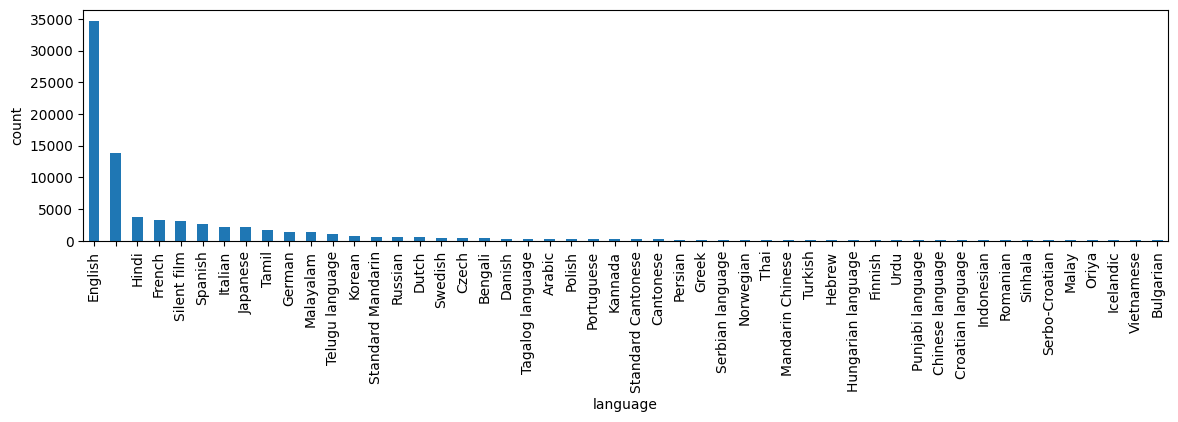

In [141]:
def get_language(string):
    try:
        return string.split('"')[3].replace("Language", "").strip()
    except:
        return ""

languages = movies_df["Movie languages (Freebase ID:name tuples)"].apply(get_language).value_counts().head(50)
plt.figure(figsize=(14,3))
plt.xlabel("language")
plt.ylabel("count")
languages.plot(kind="bar")

<Axes: title={'center': 'Movie box office revenue distribution'}, xlabel='Movie box office revenue', ylabel='frequency'>

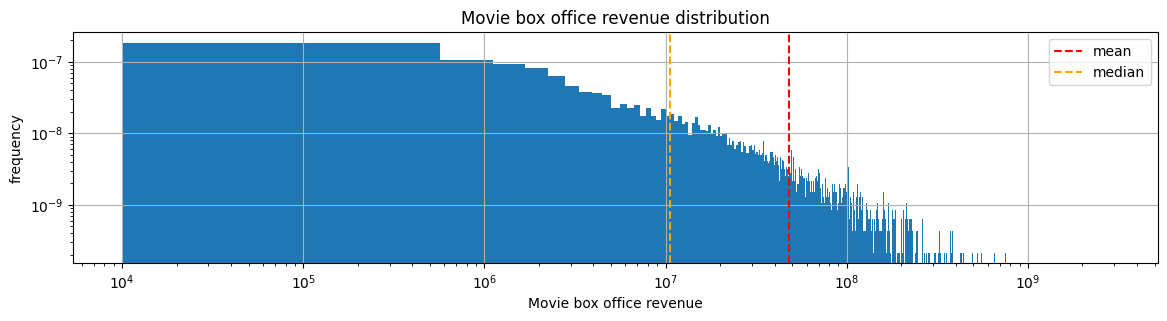

In [142]:
plt.figure(figsize=(14,3))
plt.title("Movie box office revenue distribution")
plt.xlabel("Movie box office revenue")
plt.ylabel("frequency")
#plt.xlim(0, 100000000)
plt.xscale("log")
plt.yscale("log")
plt.axvline(movies_df["Movie box office revenue"].mean(), color="red", label="mean", linestyle="--")
plt.axvline(movies_df["Movie box office revenue"].median(), color="orange", label="median", linestyle="--")
plt.legend()
movies_df["Movie box office revenue"].hist(density=True, bins=5000)

In [147]:
print("Top 50 films with the highest movie box office revenue")
movies_df.sort_values(ascending=False, by="Movie box office revenue")[["Movie name", "Movie release date", "Movie box office revenue"]].head(50)

Top 50 films with the highest movie box office revenue


,Movie name,Movie release date,Movie box office revenue
23702,Avatar,2009-12-10,2 782 275 172
22256,Titanic,1997-11-01,2 185 372 302
28192,The Avengers,2012-04-11,1 511 757 910
30278,Harry Potter and the Deathly Hallows – Part 2,2011-07-07,1 328 111 219
18645,Transformers: Dark of the Moon,2011-06-23,1 123 746 996
80920,The Lord of the Rings: The Return of the King,2003-12-17,1 119 929 521
54719,The Dark Knight Rises,2012-07-16,1 078 008 948
69586,Toy Story 3,2010-06-12,1 063 171 911
14303,Pirates of the Caribbean: On Stranger Tides,2011-05-07,1 043 871 802
50039,Star Wars Episode I: The Phantom Menace,1999-05-19,1 027 044 677
